# **Introduction to Keras and the Functional API**

The Keras Functional API is a more flexible way to build models compared to the Sequential API. It allows for creating complex models with shared layers, multiple inputs or outputs, and more intricate architectures. Using this API, you define your model's architecture as a directed acyclic graph of layers.

*******************************************************************************************************************************
*******************************************************************************************************************************

This covers the entire workflow of loading data, preprocessing, building and training a model, evaluating the model, and making predictions using the MNIST dataset.

### **1. Import Necessary Libraries**

In [28]:
import numpy as np      # for numerical operations
import pandas as pd      # for data manipulation
import tensorflow as tf      # for building and training the neural network
from tensorflow.keras.datasets import mnist      # for loading the MNIST dataset

from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Flatten      # for building the mode
from tensorflow.keras.callbacks import TensorBoard  # For visualization of training progress.
import matplotlib.pyplot as plt      # for plotting and visualizing the data and results

print(tf.__version__)

2.15.1


### **2. Load the MNIST Dataset**

**MNIST Dataset:**
The MNIST dataset consists of images of handwritten digits, where each image is labeled with a digit between 0 and 9. Therefore, there are 10 possible classes (one for each digit).

In [29]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()        # loads the MNIST dataset

### **3. Preprocess the MNIST Dataset**

In [30]:
# Normalize the images to a range of 0 to 1
# The pixel values of the images are normalized to the range [0, 1] by dividing by 255.0.
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten images to 1D vectors (Reshaping: Flattens 28x28 images into 784-dimensional vectors.)
x_train = x_train.reshape((-1, 28 * 28))
x_test = x_test.reshape((-1, 28 * 28))

### **4. Define the Model Using the Keras Functional API**

In [31]:
# Define input layer
# Input(shape=(28 * 28,)): Defines the input layer for 784-dimensional vectors.
inputs = Input(shape=(28 * 28,), name='input')

In [32]:
# Define hidden layers
# Dense(128, activation='relu'): Fully connected layer with 128 units and ReLU activation.
x = Dense(128, activation='relu', name='hidden1')(inputs)

# Dense(64, activation='relu'): Another fully connected layer with 64 units and ReLU activation.
x = Dense(64, activation='relu', name='hidden2')(x)

In [33]:
# Define output layer
# Dense(10, activation='softmax'): Output layer with 10 units (one for each class) and softmax activation.
outputs = Dense(10, activation='softmax', name='output')(x)

### **5. Create the Model**

In [34]:
# Create the model
model = Model(inputs=inputs, outputs=outputs) # Combines inputs and outputs into a Keras Model.

# Compile the model
# Configures the model for training with Adam optimizer and sparse categorical crossentropy loss.
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### **6. Train the Model**

In [35]:
# Define TensorBoard callback
OUTDIR = "./mnist_trained"
# TensorBoard: Logs training progress.
tensorboard_callback = TensorBoard(log_dir=OUTDIR, histogram_freq=1)

# Train the model
history = model.fit(x_train, y_train,
                    epochs=8,
                    batch_size=32,
                    validation_data=(x_test, y_test),
                    callbacks=[tensorboard_callback])


Epoch 1/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2391 - accuracy: 0.9304 - val_loss: 0.1348 - val_accuracy: 0.9586
Epoch 2/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1024 - accuracy: 0.9688 - val_loss: 0.0909 - val_accuracy: 0.9729
Epoch 3/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0712 - accuracy: 0.9776 - val_loss: 0.0796 - val_accuracy: 0.9756
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0542 - accuracy: 0.9829 - val_loss: 0.0863 - val_accuracy: 0.9718
Epoch 5/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0433 - accuracy: 0.9864 - val_loss: 0.0785 - val_accuracy: 0.9779
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0350 - accuracy: 0.9888 - val_loss: 0.0871 - val_accuracy: 0.9746
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0279 - accuracy: 0.9911 - val_loss: 0.0936 - val_accuracy: 0.9768

### **7. Evaluate the Model**

In [36]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')

313/313 [==============================] - 0s 1ms/step - loss: 0.0984 - accuracy: 0.9741
Test Accuracy: 0.9741
Test Loss: 0.0984


In [37]:
model.summary() # provides a detailed model summary, including the layers, output shapes, and the number of parameters.

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 hidden1 (Dense)             (None, 128)               100480    
                                                                 
 hidden2 (Dense)             (None, 64)                8256      
                                                                 
 output (Dense)              (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **8. Plot Training and Validation Metrics**

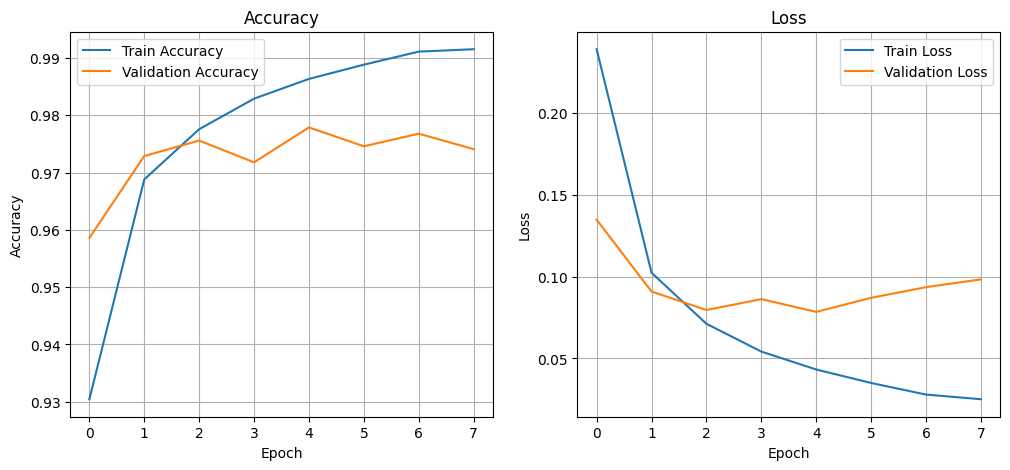

In [38]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')
plt.grid()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')
plt.grid()

plt.show()


### **9. Make Predictions with the Model**

313/313 [==============================] - 0s 1ms/step


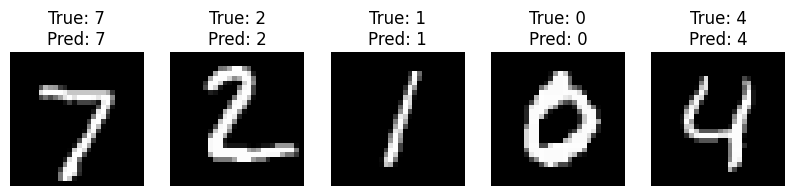

In [39]:
# Make predictions on the test dataset
predictions = model.predict(x_test)
# Get the class predictions
predicted_classes = np.argmax(predictions, axis=1)

# Define a function to plot images with their predicted labels
def plot_predictions(images, true_labels, predicted_labels, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")
        plt.axis('off')
    plt.show()

# Visualize the first 5 predictions
plot_predictions(x_test, y_test, predicted_classes, num_images=5)